In [9]:
import numpy as np
import manipulate_text as mt
import os
import matplotlib.pyplot as plt

In [4]:
#relevant paths
base_path = os.getcwd().split('scripts')[0]

In [6]:
search =True
mx_set = np.round(np.logspace(np.log10(6), np.log10(500), 20), 1)
inds = np.array([8])
mx = mx_set[inds]
if search:
    run_list = mt.find_results(0,  mx=mx_set[inds])
    print(run_list)
    espec_names = [run['file_name'].split('_info')[0]+'.npy' for run in run_list]
    bin_names = [run['file_name'].split('_info')[0]+'_bins.npy' for run in run_list]
    output_type = 'electron_spectrum/'
    bins_list = [np.load(base_path + output_type + bin_name) for bin_name in bin_names]
    espec_list = [np.load(base_path + output_type + espec_name) for espec_name in espec_names]

[{'file_name': '0009_electron_spectrum_info.txt', 'mx': 38.6, 'channel': 'bb_bar'}]


In [15]:
# DM params
norm_DM = 1.1e37 #kpc^-3 s^-1
#MSP params
E_cut = 5e4 #GeV
alpha = 1.7
egamma_rat = 1
norm_MSP = 9.5e27 #kpc^-3 GeV^-1 s^-1
def Qe_MSP(E): 
    return (alpha+2)*norm_MSP*egamma_rat*((E/E_cut)**alpha)*np.exp(-E/E_cut)

In [ ]:
np.save(espec_list*norm_DM)

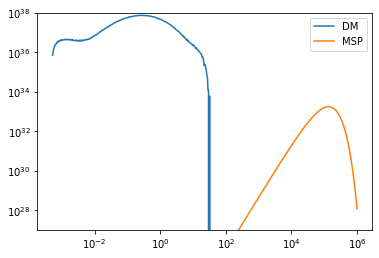

In [20]:
E = np.logspace(-1, 6, 1000)
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(bins_list[0][1:], norm_DM*bins_list[0][1:]*espec_list[0], label='DM')
ax.plot(E, E*Qe_MSP(E), label='MSP')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim([1e27, 1e38])
ax.legend()

In [23]:
#integrate DM result
bins=bins_list[0]
espec = espec_list[0]
ind = np.argmin(np.abs(bins-.1))
reimann_DM = norm_DM*np.array([(bins[i+1]-bins[i])*bins[i]*espec[i] for i in range(ind, len(espec))])
result_DM = np.sum(reimann_DM)
#integrate MSP
reimann_MSP = np.array([(E[i+1]-E[i])*E[i]*Qe_MSP(E[i]) for i in range(1000-1)])
result_MSP = np.sum(reimann_MSP)

print('DM: ', result_DM)
print('MSP: ', result_MSP)

DM:  1.5005837373842614e+38
MSP:  3.694677739070686e+38
